## Задача 2.3. Спектр отрезка синусоиды

|  Варианты:  |  1  |  2  |  3  |  4  |  5  |  6 |  7  |  8  |  9  | 10 |  11 |  12 |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:--:|:---:|:---:|:---:|:--:|:---:|:---:|
|  $f_0$**, кГц** |  10 | 100 |  60 |  40 |  65 | 90 |  30 |  20 |  55 | 75 |  35 |  50 |
| $\tau$**, мкс** | 500 | 50  | 100 | 125 | 100 | 55 | 200 | 225 | 109 | 60 | 171 | 100 |

Ниже приведен пример вычисления спектральной плотности для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0=10$ кГц длительностью  $\tau=500$  мкс. 

Для заданных параметров  $f_0$  и  $\tau$  из таблицы, построить $|X(f)|$ для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0$ длительностью  $\tau$. 

1) Сравнить положение главных спектральных максимумов с частотой синусоиды. 

2) Повторить вычисления для отрезка синусоиды, взвешанного окном Ханна соотвествующей длины. Сравнить ширину главного лепестка на нулевом уровне и значение  $|X(f)|$ на частоте $f_0$ для сигнала $x(t)$, взвешанного прямоугольным окном и окном Ханна.

3) Сравнить спектр периодического сигнала  $x(t)=\sin(2\pi f_0 t)$ с получившимися графиками. 

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

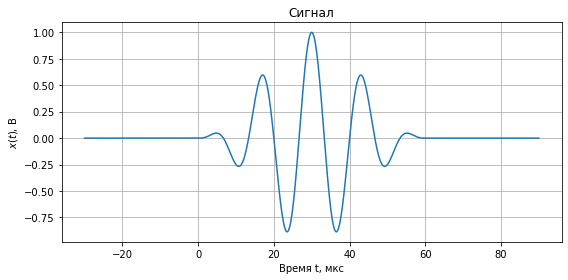

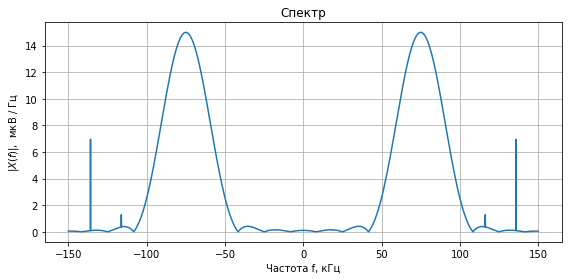

In [2]:
f0=75*1e3       # 75 кГц
tau=60*1e-6    # 60 мкс

def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        # случай прямоугольного окна
        # return np.sin(2*np.pi*f0*t) 
        # случай окна Ханна
        #
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

In [3]:
s = fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6
max_idx = np.where(s == max(s))
print(max_idx)
max_idx=max_idx[0][-1]
print(max_idx)
print(s[max_idx])
print(max(fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6))

eps = 1e-8

right_min_idx = max_idx
while s[right_min_idx] > s[right_min_idx + 1]:
    right_min_idx += 1
print(right_min_idx)


left_min_idx = max_idx
while s[left_min_idx] > s[left_min_idx - 1]:
    left_min_idx-=1
print(left_min_idx)


print(f_band[right_min_idx])
print(f_band[left_min_idx])
df = f_band[right_min_idx] - f_band[left_min_idx]
print("Ширина главного лепестка: %0.2f" %df)

print("максимальное значение спектральной плотности %0.2f" %max(fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6))

(array([ 500, 1499]),)
1499
14.999904042811485
14.999904042811485
1721
1277
108279.1395697849
41645.82291145573
Ширина главного лепестка: 66633.32
максимальное значение спектральной плотности 15.00


Для прямоугольного окна главные спектральные максимумы попадают на значения $\pm f_0$
Для окна Ханна сам сигнал стал неравномерным (что весьма логично), а главные максимумы спектральной плотности стали более выроженными. Положение их не изменилось.